数据集记录了印第安人最近五年内是否患有糖尿病的医疗数据，本代码主要是介绍从谷歌云端导入数据、数据理解、数据可视化、数据预处理、

In [2]:
from google.colab import drive
import os

drive.mount('/content/drive')
path="/content/drive/MyDrive/Colab Notebooks/Rezzsl/Machine-Learning_Dataset"
os.chdir(path) 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


加载云盘中的csv数据，查看数据的相关资料。

In [3]:
from pandas import read_csv
names=['preg','plas','pres','skin','test','mass','pedi','age','class']
data=read_csv('/content/drive/MyDrive/Colab Notebooks/Rezzsl/Machine-Learning_Dataset/pima_data.csv',names=names)
print(data.shape)#数据的维度

(768, 9)


In [4]:
peek=data.head(10)
print(peek)#数据的前10行

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


In [5]:
print(data.dtypes)#查看数据的属性和类型

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [6]:
from pandas.io.formats.format import set_option
set_option('display.width',100)#设置数据的精度，横向显示多少字符
set_option('precision',4)#数据的数值显示到小数点的后几位
print(data.describe())

           preg      plas      pres      skin      test      mass      pedi       age    class
count  768.0000  768.0000  768.0000  768.0000  768.0000  768.0000  768.0000  768.0000  768.000
mean     3.8451  120.8945   69.1055   20.5365   79.7995   31.9926    0.4719   33.2409    0.349
std      3.3696   31.9726   19.3558   15.9522  115.2440    7.8842    0.3313   11.7602    0.477
min      0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0780   21.0000    0.000
25%      1.0000   99.0000   62.0000    0.0000    0.0000   27.3000    0.2437   24.0000    0.000
50%      3.0000  117.0000   72.0000   23.0000   30.5000   32.0000    0.3725   29.0000    0.000
75%      6.0000  140.2500   80.0000   32.0000  127.2500   36.6000    0.6262   41.0000    1.000
max     17.0000  199.0000  122.0000   99.0000  846.0000   67.1000    2.4200   81.0000    1.000


查看数据的分组分布（适合分类的算法），从印第安人患有糖尿病的情况分布（对应表格中的class），查看每个类别的数据大概有多少条记录，以及分类的数据是否平衡。如果数据分布的平衡性很差，需要在数据加工阶段进行数据处理，来提高数据的分布的平衡性。

In [7]:
print(data.groupby('class').size())

class
0    500
1    268
dtype: int64


查看表格中每一个数据属性的相关性，常用的计算两个属性的方法是皮尔逊相关系数，是度量两个变量间的相关程度的方法。它的值介于（1，-1），1表示完全正相关，0表示无关，-1表示完全负相关。在机器学习中，当数据相关性较高时，有些算法（linear、Basic Logistic Regression）的性能会降低。当数据特征相关性较高时，应该考虑对数据特征进行降维处理。

In [8]:
set_option('display.width',100)
set_option('precision',2)
print(data.corr(method='pearson'))

       preg  plas  pres  skin  test  mass  pedi   age  class
preg   1.00  0.13  0.14 -0.08 -0.07  0.02 -0.03  0.54   0.22
plas   0.13  1.00  0.15  0.06  0.33  0.22  0.14  0.26   0.47
pres   0.14  0.15  1.00  0.21  0.09  0.28  0.04  0.24   0.07
skin  -0.08  0.06  0.21  1.00  0.44  0.39  0.18 -0.11   0.07
test  -0.07  0.33  0.09  0.44  1.00  0.20  0.19 -0.04   0.13
mass   0.02  0.22  0.28  0.39  0.20  1.00  0.14  0.04   0.29
pedi  -0.03  0.14  0.04  0.18  0.19  0.14  1.00  0.03   0.17
age    0.54  0.26  0.24 -0.11 -0.04  0.04  0.03  1.00   0.24
class  0.22  0.47  0.07  0.07  0.13  0.29  0.17  0.24   1.00


查看数据的分布分析，通过分析数据的高斯分布（正态分布）情况来确认数据的偏离情况。很多机器学习算法中都会假定数据遵守高斯分布，先计算数据的高斯偏离状况，在根据偏离状况装备数据。skew（）函数的结果就是显示了数据分布时左偏还是右偏。当数据接近于0时，表示数据的偏差结果非常小。

In [9]:
print(data.skew())#计算所有数据属性的高斯分布状况。

preg     0.90
plas     0.17
pres    -1.84
skin     0.11
test     2.27
mass    -0.43
pedi     1.92
age      1.13
class    0.64
dtype: float64


数据的可视化:直方图、密度图、箱线图

直方图，由一系列高度不等的纵向条纹或线段来表述数据分布的情况。

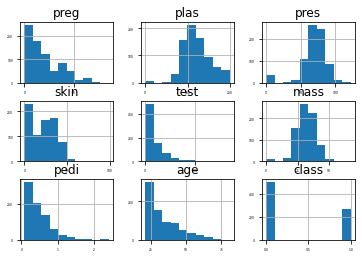

In [10]:
import matplotlib.pyplot as plt
# data.hist()#显示坐标会有些重叠
# plt.show() 
data.hist(sharex=False, sharey=False,xlabelsize=3, ylabelsize=3)#将横纵坐标设置为不可见
plt.show()#可以看出age、pedi、test也许是指数分布；mass、pres、plas也许是高斯分布。

密度图：一种表现与数据值对应的边界或域对象的图像表示方法，一般用于呈现连续变量。密度图类似于对直方图进行抽象，用平滑的线来描述数据分布。

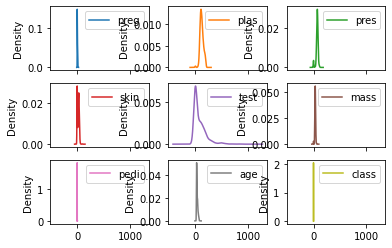

In [11]:
data.plot(kind='density',subplots=True,layout=(3,3),sharex=True)
plt.show()

箱线图：一种用于显示一组数据分散的情况的统计图。首先画一条中位数线，然后以下四分位数和上四分位数画一个盒子，上下各有一条横线，表示上边缘和下边缘，通过横线来显示数据的伸展情况，游离在边缘之外的点为异常值。

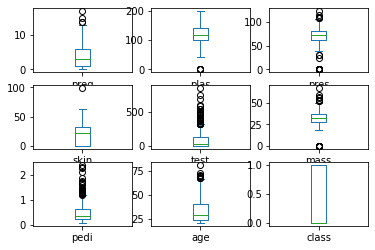

In [12]:
data.plot(kind='box',subplots=True,layout=(3,3),sharex=True)
plt.show()#不同属性的延伸截然不同。

相关矩阵图和散点图


相关矩阵图：主要是展示两个不同属性的相互影响程度。如果两个属性按照相同的方向变化，说明是正向的影响。如果两个属性朝反方向变化，说明是方向影响。

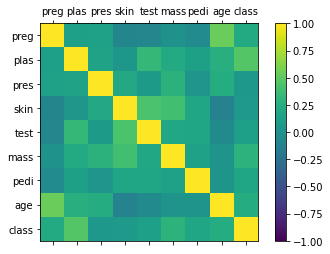

In [13]:
import numpy as np
correlations=data.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)#向绘图添加色条
ticks=np.arange(0,9,1)
ax.set_xticks(ticks)#设置刻度
ax.set_yticks(ticks)#设置刻度
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

散点矩阵图：散点矩阵图表示因变量随自变量变化的大致趋势，据此可以选择合适的函数对数据点进行拟合。散点矩阵图由两组数据构成多个坐标点，考察坐标点的分布，可以判断两个变量之间是否存在某种关联或者总结坐标点的分布模式。散点图通常用于比较跨类别的聚合数据。

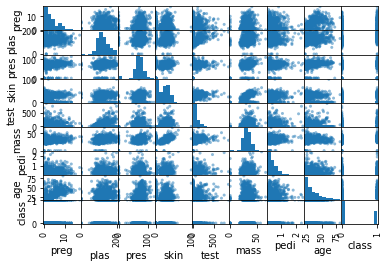

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

数据的预处理：在机器学习的模型训练之前，都需要对数据进行处理，这是一个必须的过程。不同的算法对数据有不同的假定，需要按照不同的方式转换数据。

调整数据的尺度：通过调整数据的尺度，让所有的属性按照相同的尺度来度量数据。这个方法将数据所有的属性标准化，并将数据转换成0和1之间的值（MinMaxScaler）。MinMaxScaler是将属性缩放到一个指定的范围，或者对数据进行标准化并将数据都聚集到0附近，方差为1.

In [25]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array=data.values
X=array[:,0:8]
Y=array[:,8]
transformer=MinMaxScaler(feature_range=(0,1))
newX=transformer.fit_transform(X)
set_printoptions(precision=3)
print(newX)

[[0.353 0.744 0.59  ... 0.501 0.234 0.483]
 [0.059 0.427 0.541 ... 0.396 0.117 0.167]
 [0.471 0.92  0.525 ... 0.347 0.254 0.183]
 ...
 [0.294 0.608 0.59  ... 0.39  0.071 0.15 ]
 [0.059 0.633 0.492 ... 0.449 0.116 0.433]
 [0.059 0.467 0.574 ... 0.453 0.101 0.033]]


正太化数据（Standardize Data）：有效的处理符合高斯分布的数据的手段，输出结果以0为中位数，方差为1，并作为假定数据符合高斯分布的算法的输入。在这里通过scikit-learn提供的StandardScaler类来进行正太化的数据处理。

In [32]:
from zmq.constants import XPUB_VERBOSE
from sklearn.preprocessing import StandardScaler
array=data.values
X=array[:,0:8]
Y=array[:,8]
transformer=StandardScaler().fit(X)#数据转换
newX=transformer.transform(X)#设置数据的打印格式
set_printoptions(precision=3)
print(newX)

[[ 0.64   0.848  0.15  ...  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161 ... -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 ... -1.103  0.604 -0.106]
 ...
 [ 0.343  0.003  0.15  ... -0.735 -0.685 -0.276]
 [-0.845  0.16  -0.471 ... -0.24  -0.371  1.171]
 [-0.845 -0.873  0.046 ... -0.202 -0.474 -0.871]]


标准化数据(Normalize Data)：将每一行的数据的距离处理1的数据，又叫做“归一元”处理，适合处理稀疏数据，归一元处理的数据对使用权重输入的神经网络和使用距离的K临近算法的准确度的提升有显著作用。使用scikit-learn中的Normalizer实现。

In [35]:
from sklearn.preprocessing import Normalizer
array=data.values
X=array[:,0:8]
Y=array[:,8]
transformer=Normalizer().fit(X)
newX=transformer.transform(X)
set_printoptions(precision=3)
print(newX)

[[0.034 0.828 0.403 ... 0.188 0.004 0.28 ]
 [0.008 0.716 0.556 ... 0.224 0.003 0.261]
 [0.04  0.924 0.323 ... 0.118 0.003 0.162]
 ...
 [0.027 0.651 0.388 ... 0.141 0.001 0.161]
 [0.007 0.838 0.399 ... 0.2   0.002 0.313]
 [0.008 0.736 0.554 ... 0.241 0.002 0.182]]


二值数据：使用值将数据转化为二值，大于阈值设置为1，小于阈值设置为0。使用scikit-learn中的Binarizer实现。

In [36]:
from sklearn.preprocessing import Binarizer
array=data.values
X=array[:,0:8]
Y=array[:,8]
transformer=Binarizer(threshold=0.0).fit(X)
newX=transformer.transform(X)
print(newX)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
